# *Titanic Classification*

### Importing the Dependencies

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### Data Collection & Processing

In [10]:
# load the data from csv file to Pandas DataFrame
titanic_data = pd.read_csv("titanic.csv")

In [11]:
# printing the first 5 rows of the dataframe
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
# number of rows and Columns
titanic_data.shape

(49, 12)

In [13]:
# getting some informations about the data
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  49 non-null     int64  
 1   Survived     49 non-null     int64  
 2   Pclass       49 non-null     int64  
 3   Name         49 non-null     object 
 4   Sex          49 non-null     object 
 5   Age          35 non-null     float64
 6   SibSp        49 non-null     int64  
 7   Parch        49 non-null     int64  
 8   Ticket       49 non-null     object 
 9   Fare         49 non-null     float64
 10  Cabin        9 non-null      object 
 11  Embarked     49 non-null     object 
dtypes: float64(2), int64(5), object(5)
memory usage: 4.7+ KB


In [14]:
# check the number of missing values in each column
titanic_data.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            14
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin          40
Embarked        0
dtype: int64

### Handling the Missing values

In [15]:
# drop the "Cabin" column from the dataframe
titanic_data = titanic_data.drop(columns='Cabin', axis=1)

In [16]:
# replacing the missing values in "Age" column with mean value
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

In [17]:
# finding the mode value of "Embarked" column
print(titanic_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [18]:
print(titanic_data['Embarked'].mode()[0])

S


In [19]:
# replacing the missing values in "Embarked" column with mode value
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

In [20]:
# check the number of missing values in each column
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Data Analysis

In [21]:
# getting some statistical measures about the data
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,49.00000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,25.00000,0.448980,2.428571,32.085714,0.673469,0.408163,28.305527
std,14.28869,0.502545,0.816497,16.940301,0.965828,1.097694,42.332768
min,1.00000,0.000000,1.000000,2.000000,0.000000,0.000000,7.225000
25%,13.00000,0.000000,2.000000,22.000000,0.000000,0.000000,8.029200
50%,25.00000,0.000000,3.000000,32.085714,0.000000,0.000000,15.500000
75%,37.00000,1.000000,3.000000,35.000000,1.000000,0.000000,30.070800
max,49.00000,1.000000,3.000000,78.000000,4.000000,5.000000,263.000000


In [22]:
# finding the number of people survived and not survived
titanic_data['Survived'].value_counts()

Survived
0    27
1    22
Name: count, dtype: int64

### Data Visualization

In [23]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

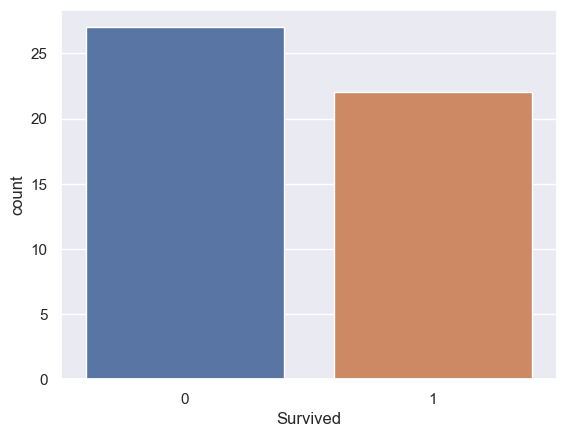

In [24]:
# making a count plot for "Survived" column
sns.countplot(x='Survived', data=titanic_data)

In [25]:
titanic_data['Sex'].value_counts()

Sex
male      25
female    24
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

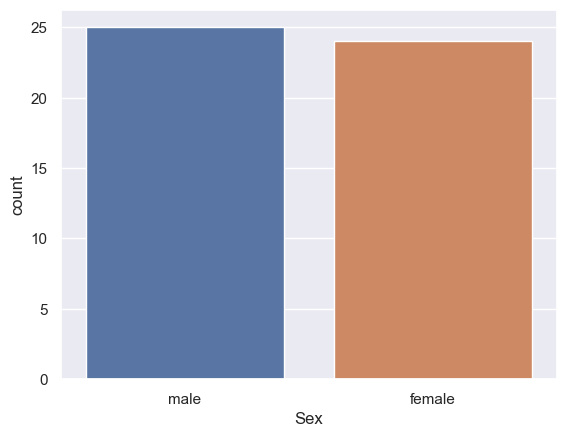

In [26]:
# making a count plot for "Sex" column
sns.countplot(x='Sex', data=titanic_data)

<Axes: xlabel='Sex', ylabel='count'>

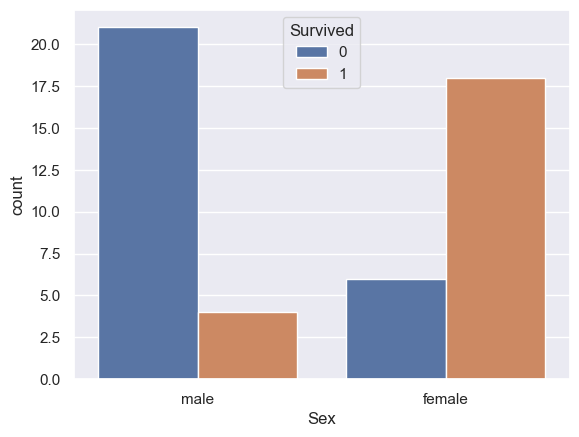

In [27]:
# number of survivors Gender wise
sns.countplot(x='Sex', hue='Survived', data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

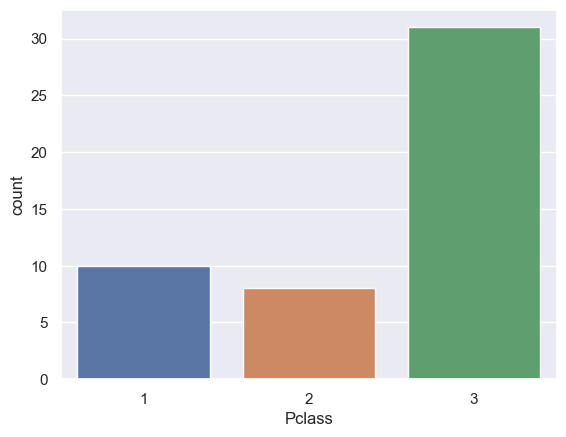

In [28]:
# making a count plot for "Pclass" column
sns.countplot(x='Pclass', data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

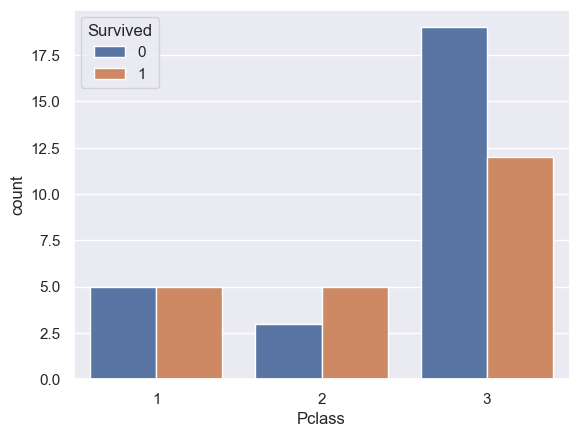

In [29]:
sns.countplot(x='Pclass', hue='Survived', data=titanic_data)

### Encoding the Categorical Columns 

In [30]:
titanic_data['Sex'].value_counts()

Sex
male      25
female    24
Name: count, dtype: int64

In [31]:
titanic_data['Embarked'].value_counts()

Embarked
S    29
C    12
Q     8
Name: count, dtype: int64

In [32]:
# converting categorical Columns

titanic_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [33]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


### Separating features & Target 

In [34]:
X = titanic_data.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
Y = titanic_data['Survived']

In [35]:
print(X)

    Pclass  Sex        Age  SibSp  Parch      Fare  Embarked
0        3    0  22.000000      1      0    7.2500         0
1        1    1  38.000000      1      0   71.2833         1
2        3    1  26.000000      0      0    7.9250         0
3        1    1  35.000000      1      0   53.1000         0
4        3    0  35.000000      0      0    8.0500         0
5        3    0  32.085714      0      0    8.4583         2
6        1    0  67.000000      0      0   51.8625         0
7        3    0   2.000000      3      1   21.0750         0
8        3    1  27.000000      0      2   11.1333         0
9        2    1  62.000000      1      0   30.0708         1
10       3    1   4.000000      1      1   16.7000         0
11       1    1  58.000000      0      0   36.5500         0
12       3    0  20.000000      0      0    8.0500         0
13       3    0  39.000000      1      5   31.2750         0
14       3    1  14.000000      0      0    7.8542         0
15       2    1  55.0000

In [36]:
print(Y)

0     0
1     1
2     1
3     1
4     0
5     0
6     0
7     0
8     1
9     1
10    1
11    1
12    0
13    0
14    0
15    1
16    0
17    1
18    0
19    1
20    0
21    1
22    1
23    1
24    0
25    1
26    0
27    0
28    1
29    0
30    0
31    1
32    1
33    0
34    0
35    0
36    1
37    0
38    0
39    1
40    0
41    0
42    0
43    1
44    1
45    0
46    0
47    1
48    0
Name: Survived, dtype: int64


### Splitting the data into training data & Test data

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [38]:
print(X.shape, X_train.shape, X_test.shape)

(49, 7) (39, 7) (10, 7)


# Model Training

### Logistic Regression

In [39]:
model = LogisticRegression()

In [40]:
# training the Logistic Regression model with training data
model.fit(X_train, Y_train)

LogisticRegression()

# Model Evaluation

### Accuracy Score

In [41]:
# accuracy on training data
X_train_prediction = model.predict(X_train)

In [42]:
print(X_train_prediction)

[1 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0
 1 0]


In [43]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.8717948717948718


In [44]:
# accuracy on test data
X_test_prediction = model.predict(X_test)

In [45]:
print(X_test_prediction)

[0 0 0 0 0 1 1 1 1 0]


In [46]:
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.7
